In [38]:
import pandas as pd
import numpy as np


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

features_df = pd.read_csv('./processed_data/processed-inputs.csv')


unique_values = features_df["status"].unique()
encoder = {value: index for index, value in enumerate(unique_values)}
print(encoder)  # Corrected variable name for printing
decoder = {v: k for k, v in encoder.items()}  # Use 'encoder' for reversing
print(decoder)

features_df["status"] = features_df["status"].replace(encoder)

# Step 2: Get 64 lines in each iteration and put to list (list of lists for X)
X = np.array([features_df.iloc[i:i+64, 3].values.flatten()
              for i in range(0, len(features_df), 64)])

{'N': 0, 'B': 1, 'H': 2}
{0: 'N', 1: 'B', 2: 'H'}


In [40]:
print(X.shape)

(200, 64)


In [41]:
# Indexes to remove, adjusted to be 0-based
indexes_to_remove = [32, 102, 104, 113, 116, 122, 137, 150]
# Adjusting to 0-based indexing
indexes_to_remove = [i - 1 for i in indexes_to_remove]

# Remove elements at the specified indexes
X = np.delete(X, indexes_to_remove, axis=0)

In [42]:
print(X.shape)

(192, 64)


In [43]:
# Step 3: Read target.csv into a DataFrame for Y
target_df = pd.read_csv('./processed_data/processed-targets.csv')
# one_hot_encoded = pd.get_dummies(target_df["x"], prefix="x")
# target_df = pd.concat(
#     [target_df.drop("x", axis=1), one_hot_encoded], axis=1)

# one_hot_encoded = pd.get_dummies(target_df["y"], prefix="y")
# target_df = pd.concat(
#     [target_df.drop("y", axis=1), one_hot_encoded], axis=1)

Y = target_df.values

In [45]:
print(X.shape)
print(X[0])
print(Y.shape)
print(Y[0])

(192, 64)
[0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 2
 0 2 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 2 0]
(192, 2)
[4 3]


In [46]:


# Ensure X and Y have compatible shapes
assert len(X) == len(Y), "The lengths of X and Y do not match."

# Step 4: Make a dataset from this
# Note: X is already a list of lists, and Y is a numpy array from the DataFrame

# Step 5: Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

# X_train, X_test, Y_train, Y_test are now ready for use in model training and evaluation

In [47]:
print(X_train.shape)
print(Y_train.shape)


(153, 64)
(153, 2)


In [48]:
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [53]:
# Create the model
model = Sequential([
    Dense(128, activation='relu', input_dim=64),
    Dense(64, activation='relu'),
    Dense(2, activation='linear')
])

model.compile(optimizer='adam', loss='mse')

In [54]:
# Step 1: Split the DataFrame into Train and Test Sets
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

Epoch 23: early stopping


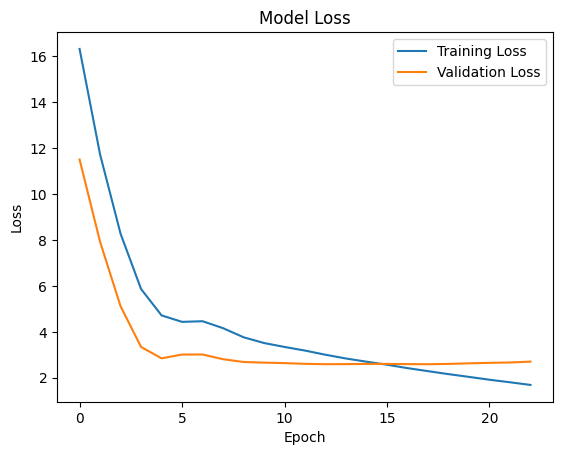

In [55]:
# Step 2: Define the model (assuming you have already defined 'model' as per previous instructions)
# Add EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, verbose=1, mode='min')

# Step 3: Model Training Loop
history = model.fit(X_train, Y_train, epochs=100,
                    validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Step 4: Plot Losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [56]:
model.save('./model/keras-ann-model.h5')
save_model(model, './model/keras-ann-model.keras')